In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import distance_matrix

In [2]:
import os
cwd = os.getcwd()
print(cwd)

C:\Users\dapar\Documents\business_analytics\scripts\berlin52


In [3]:
locations = pd.read_table('berlin52.tsp', skiprows=6, skipfooter=1, sep=' ', names=('location_id', 'x', 'y'), engine='python')
locations = locations.set_index('location_id')
print(locations)

                  x       y
location_id                
1             565.0   575.0
2              25.0   185.0
3             345.0   750.0
4             945.0   685.0
5             845.0   655.0
6             880.0   660.0
7              25.0   230.0
8             525.0  1000.0
9             580.0  1175.0
10            650.0  1130.0
11           1605.0   620.0
12           1220.0   580.0
13           1465.0   200.0
14           1530.0     5.0
15            845.0   680.0
16            725.0   370.0
17            145.0   665.0
18            415.0   635.0
19            510.0   875.0
20            560.0   365.0
21            300.0   465.0
22            520.0   585.0
23            480.0   415.0
24            835.0   625.0
25            975.0   580.0
26           1215.0   245.0
27           1320.0   315.0
28           1250.0   400.0
29            660.0   180.0
30            410.0   250.0
31            420.0   555.0
32            575.0   665.0
33           1150.0  1160.0
34            700.0 

[]

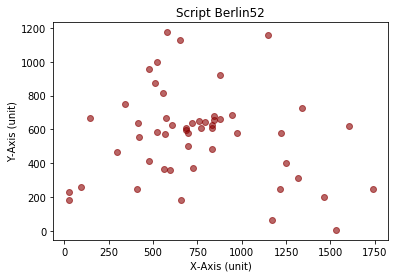

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(locations.x, locations.y, 'o', color='darkred', alpha=.6)

ax.set(title='Script Berlin52', ylabel='Y-Axis (unit)', xlabel='X-Axis (unit)')
#ax.legend(loc='best') #no overlapping plot elements

#plt.show()

plt.plot()

In [5]:
dist_mat = pd.DataFrame(distance_matrix(locations[['x', 'y']], locations[['x', 'y']]),
                        index=locations.index,
                        columns=locations.index)

In [6]:
def build_initial_solution(dist_mat, start_and_finish_point=1):
    route = list()
    route.append(start_and_finish_point)
    
    for point in dist_mat.columns:
        potential_next_points = dist_mat[point].loc[[p not in route for p in dist_mat.columns]]
        try:
            next_point = potential_next_points.idxmin()
            route.append(next_point)
        except ValueError:
            break
            
    # Closing the cycle        
    route.append(start_and_finish_point)
    
    return route

In [7]:
def plot_route(route):
    r = dict()
    r['location_id'] = route
    r['x'] = list()
    r['y'] = list()
    
    for location in route:
        r['x'].append(locations.x[location])
        r['y'].append(locations.y[location])
        
    df = pd.DataFrame(r)
    df = df.set_index('location_id')
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(df.x, df.y, '-o', color='darkred', alpha=.6)
    ax.set(title='Script Berlin52', ylabel='Y-Axis (unit)', xlabel='X-Axis (unit)')
    
    return plt.plot()
#plt.plot(df.x, df.y, '-o')

In [8]:
def total_distance(route, dist_mat):
    total_dist = 0
    
    for i, point in enumerate(route):
        try:
            next_point = route[i + 1]
        except IndexError:
            break
        
        total_dist += dist_mat[point][next_point]
        
    return total_dist

In [9]:
def swap_2opt(route, i, k):
    assert i >= 0 and i < (len(route) - 1)
    assert k > i and k < len(route)
    new_route = route[0:i]
    new_route.extend(reversed(route[i:k + 1]))
    new_route.extend(route[k+1:])
    assert len(new_route) == len(route)
    return new_route

In [10]:
def local_search(route):
    improvement = True
    best_route = route
    best_distance = total_distance(route, dist_mat)
    while improvement: 
        improvement = False
        for i in range(1, len(best_route) - 2):
            for k in range(i+1, len(best_route) - 1):
                new_route = swap_2opt(best_route, i, k)
                new_distance = total_distance(new_route, dist_mat)
                if new_distance < best_distance:
                    best_distance = new_distance
                    best_route = new_route
                    improvement = True
                    print(best_distance)
                    break #improvement found, return to the top of the while loop
            if improvement:
                break
    
    assert len(best_route) == len(route)
    return best_route

Total distance initial solution: 22238.01078826299
22170.27885765254
22100.455367499068
22002.513576451955
20816.395273219787
20763.072865377242
20724.257181832454
20406.53707432894
20359.839881225522
20057.42242992604
19996.382035541155
19986.72931711715
19780.426988943364
19780.140668097603
19760.389590388808
19708.814751932914
19612.106814926316
19491.679621954474
19229.003758018596
19167.912412838574
18871.83696296047
18806.52031043327
18804.74211304837
18564.430333876167
18559.0099082025
18502.838129156855
18468.040361983716
18261.99256502628
18197.18740645757
18053.189080397013
18034.05336323357
18020.09695306246
17793.708253707133
17739.71087475668
17633.574999205284
17627.788713828264
17491.36919901753
17437.256703490915
17437.256703490908
17327.330671898908
16934.72510082381
16901.457863518157
16641.990865074305
16446.311113045627
16246.111207912934
16246.111207912933
16232.59457599907
15823.166287878847
15684.715219325588
15596.317619090398
15596.317619090396
15593.7094156619

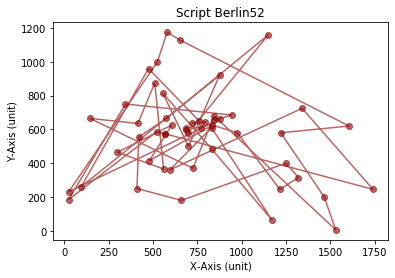

In [11]:
r = build_initial_solution(dist_mat)
plot_route(r)
plt.savefig('../berlin52/berlin52_initial.png')
print(f"Total distance initial solution: {total_distance(r, dist_mat)}")
r = local_search(r)
print(f"Total distance final solution: {total_distance(r, dist_mat)}")

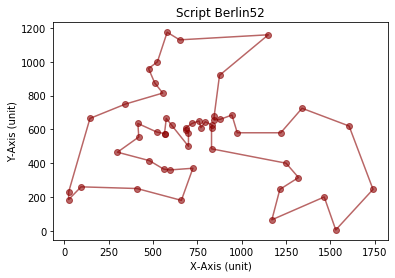

In [12]:
plot_route(r)
plt.savefig('../berlin52/berlin52_2opt.png')